In [23]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
import sympy as sp

In [25]:
from numpy import sign

In [26]:
from decimal import *

Comenzamos definiendo S y M, teniendo en cuenta que mi DNI es 49617109

In [27]:
S=4+9+6+1+7+1+0+9

In [28]:
M=S/8

In [29]:
S,M

(37, 4.625)

Tenemos que resolver la ecuación cúbica 
$$x^3+4.625x+37=0$$

Comenzamos definiendo la función:

In [34]:
x = sp.Symbol('x')
def f(x):
    return x**3+M*x+S

Vamos a comenzar esbozando la gráfica y así podremos, posteriormente, elegir el intervalo.

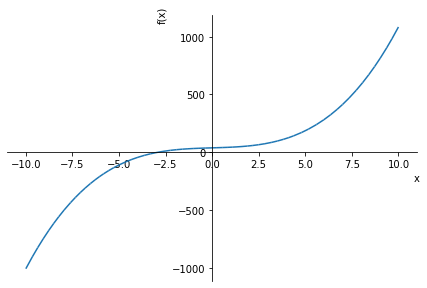

In [37]:
sp.plot(f(x))

Vamos a esbozarla en un intervalo más pequeño, para apreciarlo mejor:

In [32]:
a = -3; b = -2;

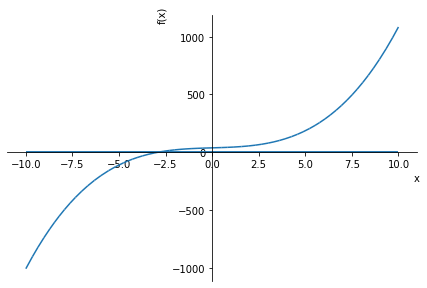

In [43]:
sp.plot(f(x),a,b)

Implementamos una función para calcular la raíz exacta:

In [39]:
def solucion_exacta(f, a=-sp.oo, b=sp.oo, cifras=None):
    
    x = sp.Symbol('x')
    try:
        sol_exact = sp.solve(f(x), x)
    except:
        sol_exact = []
    
    for sol in sol_exact:
        if sol.is_real:
            if sol >= a and sol <= b:
                print("Solución exacta en decimal:", sol.evalf())
                if cifras:
                    print("Solución exacta con", cifras, "cifras significativas:", sol.evalf(n=cifras+1))
                return sol
    
    print("sympy no ha podido encontrar la solución exacta")

In [47]:
raiz = solucion_exacta(f, -3, -2, cifras=5)

Solución exacta en decimal: -2.87294087098884
Solución exacta con 5 cifras significativas: -2.87294


Si dibujamos esta raíz en un intervalo de longitud uno:

In [52]:
a = -3; b = -2;

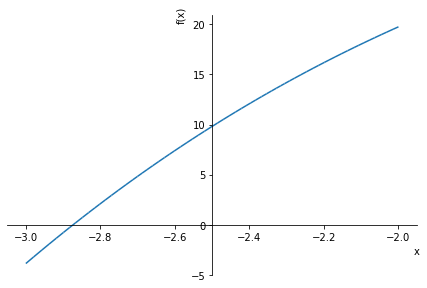

In [54]:
sp.plot(f(x),(x,a,b))

Podemos apurar más esta representación:

In [55]:
a = -2.9; b = -2.8;

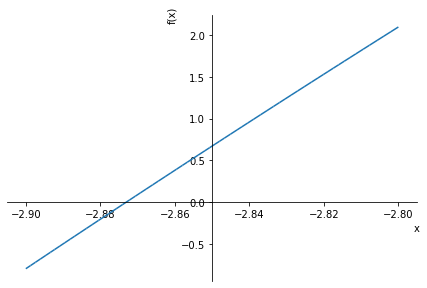

In [56]:
sp.plot(f(x),(x,a,b))

Tomaremos el intervalo $[-3,-2]$, que tiene longitud uno y usaremos el método de biseccion:

In [57]:
f(-3), f(-2)

(-3.875, 19.75)

Hay cambio de signo, luego, hay una raíz en dicho intervalo:

In [58]:
def biseccion(f, a, b, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    niter = 0
    while niter < maxiter:
        niter += 1
        c = (a+b)/2
        if abs(f(c)) < prec:
            exit = 'precisión'
            break
        if sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c
        if b-a < tol:
            exit = 'tolerancia'
            break
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(c))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(c), cifras))
    print('Número de iteraciones:', niter)
    
    return c

Usaremos una tolerancia de una décima:

In [63]:
biseccion(f,-3,-2,tol=10**(-1))

maxiter=100, tol=0.1, prec=0.001, cifras=3
Se ha alcanzado la máxima tolerancia
Aproximación de la solución: -2.8125
Aproximación de la solución con 3 cifras significativas: -2.812
Número de iteraciones: 4


-2.8125

Vamos ahora a realizar el método de Newton-Raphson, usando -2.8125 como punto de inicio:

In [64]:
def newton_raphson(f, df, x0, a=-sp.oo, b=sp.oo, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    niter = 0
    while niter < maxiter:
        niter += 1
        x1 = x0 - f(x0)/df(x0)
        if abs(f(x1)) < prec:
            exit = 'precisión'
            break
        if abs(x1-x0) < tol:
            exit = 'tolerancia'
            break
        x0 = x1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(x1))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(x1), cifras))
    print('Número de iteraciones:', niter)
    
    return x1

In [65]:
sp.diff(x**3+M*x+S,x)

3*x**2 + 4.625

In [66]:
def df(x):
    return 3*x**2+M

In [70]:
newton_raphson(f, df, -2.8125, prec=10**(-9))

maxiter=100, tol=1e-05, prec=1e-09, cifras=9
Se ha alcanzado la precisión deseada
Aproximación de la solución: -2.872940870988875960989616942242719233036041259765625
Aproximación de la solución con 9 cifras significativas: -2.872940871
Número de iteraciones: 3


-2.872940870988876

Ya lo he hecho por arriba, pero vuelvo a añadir la solución exacta:

In [72]:
raiz = solucion_exacta(f, -3, -2, cifras=5)

Solución exacta en decimal: -2.87294087098884
Solución exacta con 5 cifras significativas: -2.87294
